In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score


# Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")


In [3]:
# 550 data with 300 features
print(x_train.shape)


(550, 300)


In [4]:
# It's a binary classification problem
print(np.unique(y_train))


[0 1]


# Question 1

In [5]:
def cross_validation(x_train, y_train, k):
    idx_shuffle = np.arange(x_train.shape[0])
    np.random.shuffle(idx_shuffle)
    k_fold_ = []
    valid_tail = 0
    length = idx_shuffle.shape[0] // k
    for i in range(k):
        # If the sample size is not divisible by K
        if i < idx_shuffle.shape[0] % k:
            valid_tail = valid_tail + (length+1)
            valid_head = valid_tail - (length+1)
        else:
            valid_tail = valid_tail + length
            valid_head = valid_tail - length
        valid = []
        valid = np.sort(idx_shuffle[valid_head:valid_tail])
        if valid_head == 0 and valid_tail != idx_shuffle.shape[0]:
            k_fold_train = idx_shuffle[valid_tail:]
        elif valid_head != 0 and valid_tail == idx_shuffle.shape[0]:
            k_fold_train = idx_shuffle[:valid_head]
        elif valid_head == 0 and valid_tail == idx_shuffle.shape[0]:
            k_fold_train = idx_shuffle
        else:
            k_fold_train = np.concatenate((idx_shuffle[:valid_head],
                                           idx_shuffle[valid_tail:]))
        k_fold_train = np.sort(k_fold_train)
        k_fold_.append([k_fold_train, valid])
        # print("Split: %s,\nTraining index: %s,\nValidation index: %s"
        #      % (i+1, k_fold_train, valid))
    return k_fold_


### If the sample size is divisible by K with less data

In [8]:
kfold_data_n = cross_validation(x_train[0:20], y_train[0:20], k=10)
# should contain 10 fold of data
assert len(kfold_data_n) == 10
# each element should contain train fold and validation fold
assert len(kfold_data_n[0]) == 2
# The number of data in each validation fold
# should equal to training data divieded by K
assert kfold_data_n[0][1].shape[0] == 2
for i in range(len(kfold_data_n)):
    print("Split: %s,\nTraining index: %s, Training length: %s\n\
Validation index: %s, Validation length: %s"
          % (i+1, kfold_data_n[i][0], kfold_data_n[i][0].shape[0],
             kfold_data_n[i][1], kfold_data_n[i][1].shape[0]))


Split: 1,
Training index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18], Training length: 18
Validation index: [17 19], Validation length: 2
Split: 2,
Training index: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 19], Training length: 18
Validation index: [11 14], Validation length: 2
Split: 3,
Training index: [ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19], Training length: 18
Validation index: [4 5], Validation length: 2
Split: 4,
Training index: [ 0  1  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19], Training length: 18
Validation index: [ 2 12], Validation length: 2
Split: 5,
Training index: [ 0  1  2  3  4  5  6  7  8  9 11 12 14 15 16 17 18 19], Training length: 18
Validation index: [10 13], Validation length: 2
Split: 6,
Training index: [ 1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19], Training length: 18
Validation index: [0 6], Validation length: 2
Split: 7,
Training index: [ 0  1  2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19], Training length

### If the sample size is not divisible by K with less data

In [9]:
kfold_data_n = cross_validation(x_train[0:23], y_train[0:23], k=10)
# should contain 10 fold of data
assert len(kfold_data_n) == 10
# each element should contain train fold and validation fold
assert len(kfold_data_n[0]) == 2
# The number of data in each validation fold
# should equal to training data divieded by K
assert kfold_data_n[0][1].shape[0] == 3
for i in range(len(kfold_data_n)):
    print("Split: %s,\nTraining index: %s, Training length: %s\n\
Validation index: %s, Validation length: %s"
          % (i+1, kfold_data_n[i][0], kfold_data_n[i][0].shape[0],
             kfold_data_n[i][1], kfold_data_n[i][1].shape[0]))


Split: 1,
Training index: [ 0  1  2  4  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22], Training length: 20
Validation index: [ 3  5 16], Validation length: 3
Split: 2,
Training index: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 20 22], Training length: 20
Validation index: [ 6 19 21], Validation length: 3
Split: 3,
Training index: [ 0  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21], Training length: 20
Validation index: [ 1 12 22], Validation length: 3
Split: 4,
Training index: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 18 19 20 21 22], Training length: 21
Validation index: [ 9 17], Validation length: 2
Split: 5,
Training index: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22], Training length: 21
Validation index: [ 2 15], Validation length: 2
Split: 6,
Training index: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 21 22], Training length: 21
Validation index: [ 8 18], Validation length: 2
Split: 7,
Training index: [ 1  2  3  4  

### The result of given data

In [7]:
# If the sample size is divisible by K
kfold_data = cross_validation(x_train, y_train, k=10)
# should contain 10 fold of data
assert len(kfold_data) == 10
# each element should contain train fold and validation fold
assert len(kfold_data[0]) == 2
# The number of data in each validation fold
# should equal to training data divieded by K
assert kfold_data[0][1].shape[0] == 55
for i in range(len(kfold_data)):
    print("Split: %s,\nTraining index: %s, Training length: %s\n\
Validation index: %s, Validation length: %s"
          % (i+1, kfold_data[i][0], kfold_data[i][0].shape[0],
             kfold_data[i][1], kfold_data[i][1].shape[0]))


Split: 1,
Training index: [  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  35  36  37  38  39
  40  41  42  43  44  45  46  48  50  51  52  53  54  55  56  57  58  60
  61  62  63  64  65  66  68  69  70  71  72  73  74  75  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 148 149 151 152 153 154 155
 156 157 158 159 160 162 163 164 165 166 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 194
 195 198 199 200 203 204 205 206 208 209 210 211 212 213 214 215 216 217
 218 219 220 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 250 251 252 253 254 255
 256 258 259 260 261 262 

# Question 2

In [7]:
def generate_param(a, b):
    C = []
    gamma = []
    avg_score = []
    for i in range(a, b):  # adjustable
        C.append(10**i)
        gamma.append(round(1/x_train.shape[1], 3) * (10**i))
    gamma = [round(i, 7) for i in gamma]
    return C, gamma


def grid_search(x_train, y_train, k, C, gamma, mode):
    avg_score = []
    for i, C_ in enumerate(C):
        for j, gamma_ in enumerate(gamma):
            if mode == 'classify':
                clf = SVC(C=C_, kernel='rbf', gamma=gamma_)
                kfold = cross_validation(x_train, y_train, k)
                sc_train = []
                for m in range(len(kfold)):
                    clf.fit(x_train[kfold[m][0].astype(int)],
                            y_train[kfold[m][0].astype(int)])
                    clf.predict(x_train[kfold[m][1].astype(int)])
                    sc = clf.score(x_train[kfold[m][1].astype(int)],
                                   y_train[kfold[m][1].astype(int)])
                    sc_train.append(sc)
                avg_sc = sum(sc_train) / len(sc_train)
                avg_score.append(avg_sc)
                best_idx = avg_score.index(max(avg_score))
            else:
                clf = SVR(C=C_, kernel='rbf', gamma=gamma_)
                kfold = cross_validation(x_train, y_train, k)
                sc_train = []
                for m in range(len(kfold)):
                    clf.fit(x_train[kfold[m][0].astype(int)],
                            y_train[kfold[m][0].astype(int)])
                    clf.predict(x_train[kfold[m][1].astype(int)])
                    sc = clf.score(x_train[kfold[m][1].astype(int)],
                                   y_train[kfold[m][1].astype(int)])
                    sc_train.append(sc)
                avg_sc = sum(sc_train) / len(sc_train)
                avg_score.append(avg_sc)
                best_idx = avg_score.index(max(avg_score))

    best_C_ = C[best_idx//len(C)]
    best_gamma_ = gamma[best_idx % len(gamma)]
    score_2D_ = np.reshape((np.array(avg_score)).round(decimals=2),
                           (len(C), len(gamma)))
    return best_C_, best_gamma_, score_2D_


In [8]:
C_, gamma_ = generate_param(-4, 4)
best_C, best_gamma, score_2D_ =\
    grid_search(x_train, y_train,
                k=5, C=C_, gamma=gamma_,
                mode='classify')

print(f'best_C = {best_C}, best_gamma = {best_gamma}')


best_C = 1000, best_gamma = 3e-05


# Question 3

In [9]:
def heatmap_plot(C, gamma, score_2D):
    fig, ax = plt.subplots()
    im = ax.imshow(score_2D)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(gamma)))
    ax.set_yticks(np.arange(len(C)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(gamma)
    ax.set_yticklabels(C)
    ax.set_ylabel("C Parameter")
    ax.set_xlabel("gamma Parameter")
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(C)):
        for j in range(len(gamma)):
            text = ax.text(j, i, score_2D[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Hyperparameter Gridsearch")
    cbar_kw = {}
    cbarlabel = ""
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    plt.show()
    return


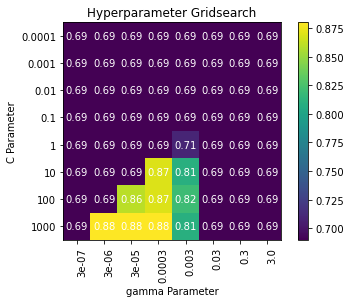

In [10]:
heatmap_plot(C_, gamma_, score_2D_)


# Question 4

In [11]:
clf = SVC(C=best_C, kernel='rbf', gamma=best_gamma)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))


Accuracy score:  0.90625


# Question 5

In [12]:
train_df = pd.read_csv("../HW1/train_data.csv")
x_train = train_df['x_train'].to_numpy().reshape(-1, 1)
y_train = train_df['y_train'].to_numpy()

test_df = pd.read_csv("../HW1/test_data.csv")
x_test = test_df['x_test'].to_numpy().reshape(-1, 1)
y_test = test_df['y_test'].to_numpy()


In [13]:
# Calculate the mean square error
def MSE(y, y_pred):
    loss = np.sum(np.power((y - y_pred), 2)) / y.shape[0]
    return loss


In [14]:
# Linear regression #
w_init = np.random.normal(0, np.std(x_train), 2)
learning_rate = 1e-3
# Assume my linear regression function is y = b0 + b1x
epoch = 3000


# Gradient Descent
# To calculate the gradient with the mean square error as objective function
def grad_MSE(x, y, y_pred, b0, b1):
    db0 = np.sum(-2 * (y - y_pred)) / x.shape[0]
    db1 = np.sum(-2 * np.multiply(x[:, 0], (y - y_pred))) / x.shape[0]
    b0 = b0 - db0 * learning_rate
    b1 = b1 - db1 * learning_rate
    return b0, b1

b0_MSE, b1_MSE = w_init[0], w_init[1]
loss_MSE = np.zeros(epoch)

for i in range(epoch):
    y_predict = b0_MSE * np.ones((x_train.shape[0], 1)) + b1_MSE * x_train
    loss_MSE[i] = MSE(y_train, y_predict[:, 0])
    b0_MSE, b1_MSE = grad_MSE(x_train, y_train, y_predict[:, 0],
                              b0_MSE, b1_MSE)

y_pred_regression = b0_MSE * np.ones((x_test.shape[0], 1)) + b1_MSE * x_test
print(f'B0 = {b0_MSE}, B1 = {b1_MSE}')


B0 = -0.006087345203454847, B1 = 0.4479764790909374


In [15]:
C_R, gamma_R = generate_param(-4, 4)
best_C_R, best_gamma_R, score_2D_R =\
    grid_search(x_train, y_train,
                k=5, C=C_R, gamma=gamma_R,
                mode='regression')

print(f'best_C = {best_C_R}, best_gamma = {best_gamma_R}')
clf = SVR(C=best_C_R, kernel='rbf', gamma=best_gamma_R)
clf.fit(x_train, y_train)
y_pred_SVR = clf.predict(x_test)


best_C = 10, best_gamma = 0.01


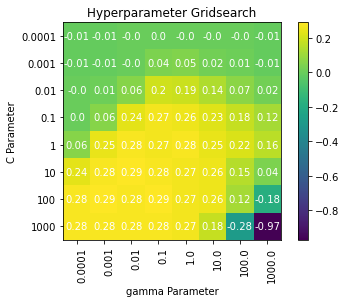

In [16]:
heatmap_plot(C_R, gamma_R, score_2D_R)


In [17]:
print(f'The mean square error of linear regression = \
{MSE(y_test, y_pred_regression[:,0])}')
print(f'The mean square error of SVR = {MSE(y_test, y_pred_SVR)}')


The mean square error of linear regression = 0.4912956234486029
The mean square error of SVR = 0.492348569957383
